# Introduction

This is an example of the implementation of my quantitative strategy. This strategy is based on factor investing, more precisely, the momentum technique. Furthermore, we conducted an initial analysis of the performance metrics of this strategy, using the IBOV as a parameter.

For this study, we configured a portfolio consisting of 10 stocks , equal weights , selected from the IBOV universe. The strategy's analysis window covers a one-year working period, equivalent to 252 days, these parameters were chosen according to literature. Due to the significantly large duration of this period, we decided not to consider brokerage costs in this study.


Load Data

In [1]:
from modules.load_data import load_data_br
dict_data_br = load_data_br()


A single day example

In [2]:
from example.strategy_momentum import *
strategy_momentum(dict_data_br, t = 500, size = 10)

,date,ticker,weights
0,2011-12-29,MPXE3,0.1
1,2011-12-29,BPNM4,0.1
2,2011-12-29,CIEL3,0.1
3,2011-12-29,VIVT4,0.1
4,2011-12-29,KLBN4,0.1
5,2011-12-29,ELPL4,0.1
6,2011-12-29,TIMP3,0.1
7,2011-12-29,RDCD3,0.1
8,2011-12-29,CPFE3,0.1
9,2011-12-29,BRFS3,0.1


# Simulator

In [3]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from modules.strategy_simulator import momentum_simulator

#import momentum strategy
from example.strategy_momentum import strategy_momentum

# Initialize data structures to store results
ret_port = pd.Series(dtype="float64")  # Series to store portfolio returns
weights_db = pd.DataFrame()  # DataFrame to store historical weights

# Loop through a range of time values
for t in tqdm(range(500, len(dict_data_br['prices'].index) - 1)):
    
    # Use the strategy simulator to get portfolio's historical weights [weights_db]
    # and its next day returns [ret_port]

    ret_port, weights_db = momentum_simulator(path = "example/",
                                              data_source = dict_data_br,
                                              t = t,
                                              ret_port = ret_port,
                                              weights_db = weights_db,
                                              size = 10)


100%|██████████| 2940/2940 [01:10<00:00, 41.48it/s]


# Load IBOV returns

In [4]:
ibov_historico = pd.read_parquet("dataset/BR/ibov_hist.parquet")
ibov_historico.drop(columns = ['close'], inplace = True)
# atualizar o ibov historico para començar no dia 2011-12-29 
ibov_historico = ibov_historico.loc['2011-12-29':]
ibov_historico 

,returns
date,
2011-12-29,0.003902
2012-01-02,0.018764
2012-01-03,0.024512
2012-01-04,0.001686
2012-01-05,-0.013875
...,...
2023-09-13,0.001760
2023-09-14,0.010234
2023-09-15,-0.005325


# Analysis of momentum strategy

For the analysis of the strategy, a "Tearsheet" has been generated and is located in the directory under the name "momentum.html." To delve into the analysis, we will be utilizing some of the charts within this document. For a more comprehensive view of the strategy, it is advised to refer to the Tearsheet for detailed insights.

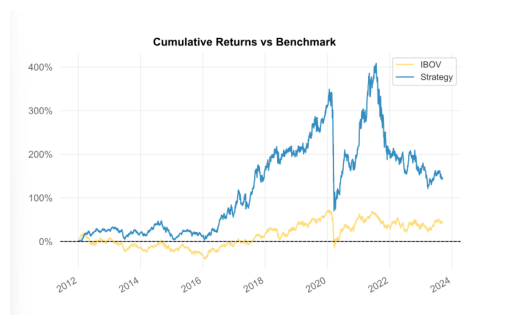

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_Retorno_cumulativo = mpimg.imread('images/Retorno_cumulativo.png')

plt.imshow(img_Retorno_cumulativo)
plt.axis('off') 
plt.show()

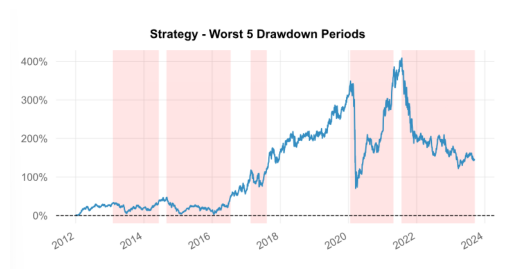

In [6]:
img_DrawDown = mpimg.imread('images/DrawDown.png')


plt.imshow(img_DrawDown)
plt.axis('off') 
plt.show()

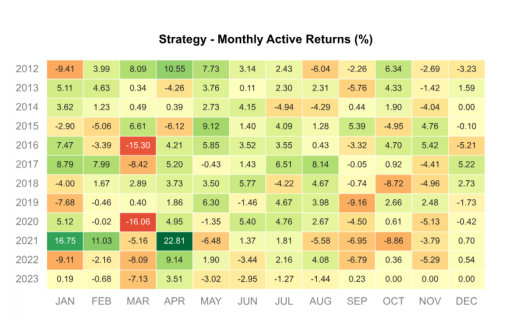

In [7]:
img_Retorno_mensal = mpimg.imread('images/Retorno_mensal.png')

plt.imshow(img_Retorno_mensal)
plt.axis('off') 
plt.show()

# So, This strategy Works ? 
The strategy yielded inconclusive results. What we can conclude is that, in the way it was configured, it performed considerably worse than the IBOV. To outperform the benchmark, it is necessary to experiment with variations in the strategy's parameters. In summary, fine-tuning and optimizing the strategy are required to achieve more favorable results.

# Next steps 
1. * Optimize the strategy parameters
2. * Improve the strategy to sell stock too
3. * Improving the strategy involves implementing it with different weightings, Stop loss condition and simulating its performance in a real-world environment, taking into account brokerage costs and other relevant factors